In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(16,12)})

In [ ]:
data = pd.read_excel('/content/Data Bencana di Asia 2021 (2).xlsx')

In [ ]:
data

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages,"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,2021-9116-AFG,2021,9116,DR-2021-000022,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100,1,272;273;274;275;278;282;283;289;298;299;300,NaN,"Badakhshan, Badghis, Baghlan, Balkh, Faryab, H..."
1,2021-0263-AFG,2021,263,FL-2021-000050,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100,1;2,272;274;276;277;280;284;286;288;289;298;299;30...,3561,"Badakhshan, Baghlan, Bamyan, Farah, Ghor, Kabu..."
2,2021-0453-AFG,2021,453,FF-2021-000102,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100,2,NaN,3680,Kamdesh (Adm2).
3,2021-0144-AFG,2021,144,NaN,Natural,Hydrological,Landslide,Avalanche,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100,2,NaN,99998,Raghestan (Adm2).
4,2021-0455-BGD,2021,455,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100,2,NaN,5772,Cox's Bazar (Adm2).
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2021-0217-VNM,2021,217,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100,1;2,3345,32447;32671,"Ha Giang (Adm1). Tran Yen, Van Ban (Adm2)."
171,2021-0595-VNM,2021,595,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Conson' (Jolina),...,NaN,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN
172,2021-0813-VNM,2021,813,TC-2021-000202,Natural,Meteorological,Storm,Tropical cyclone,NaN,Typhoon 'Rai' (Odette),...,NaN,NaN,NaN,9000.0,9000.0,100,1,3334;3366;3374,NaN,"Binh Duong, Nghe An, Quang Ngai (Adm1)."
173,2021-0270-YEM,2021,270,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100,1,3407;3408;3411;3419;3420;3421;3424;3425;144970...,NaN,"Abyan, Aden, Al Dhale'e, Al Hudaydah, Hadramau..."


Check Missing Value

In [ ]:
import missingno as msno
%matplotlib inline

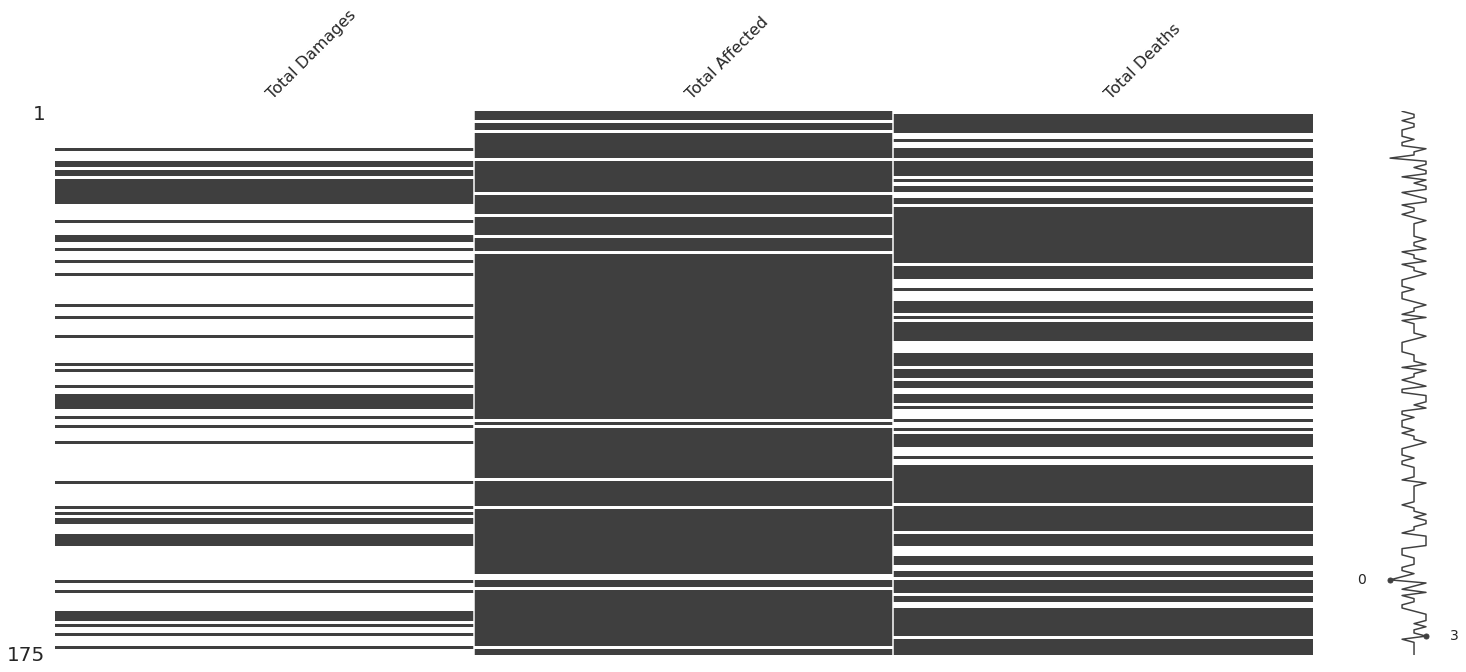

In [ ]:
# Gives positional information of the missing values
msno.matrix(data[{'Total Deaths','Total Affected','Total Damages'}])

In [ ]:
data['Total Deaths'].sort_values()

93     1.0
148    1.0
134    1.0
17     1.0
32     1.0
      ... 
150    NaN
155    NaN
158    NaN
159    NaN
169    NaN
Name: Total Deaths, Length: 175, dtype: float64

In [ ]:
data['Total Affected'].sort_values()

120     4.0
164     6.0
121     6.0
18      8.0
117    10.0
       ... 
127     NaN
149     NaN
150     NaN
153     NaN
172     NaN
Name: Total Affected, Length: 175, dtype: float64

In [ ]:
data['Total Damages'].sort_values()

101     120.0
131     240.0
12     2500.0
137    3114.0
165    7500.0
        ...  
169       NaN
170       NaN
171       NaN
173       NaN
174       NaN
Name: Total Damages, Length: 175, dtype: float64

Fill Missing Value with 0

In [ ]:
data['Total Deaths'][data['Total Deaths'].isna()==True]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data['Total Affected'][data['Total Affected'].isna()==True]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data['Total Damages'][data['Total Damages'].isna()==True]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Data Unique Check 

In [ ]:
data_clustering = pd.DataFrame({'Code':data['Code'],'Total Deaths':data['Total Deaths'],'Total Affected':data['Total Affected'],'Total Damages':data['Total Damages']})

In [ ]:
data_clustering

,Code,Total Deaths,Total Affected,Total Damages
0,1,0.0,11000000.0,0.0
1,1,116.0,30833.0,0.0
2,1,260.0,4200.0,0.0
3,1,20.0,0.0,0.0
4,2,21.0,268744.0,0.0
...,...,...,...,...
170,35,3.0,180.0,0.0
171,35,2.0,310.0,0.0
172,35,3.0,0.0,9000.0
173,36,13.0,22380.0,0.0


In [ ]:
data_clustering['Code'].value_counts()

10    28
9     19
5     17
26    14
19     8
35     8
25     8
11     7
13     6
31     6
27     5
23     4
1      4
4      4
12     3
33     3
30     3
8      2
3      2
29     2
28     2
24     2
36     2
21     2
2      2
18     2
22     1
15     1
7      1
6      1
20     1
32     1
17     1
34     1
16     1
14     1
Name: Code, dtype: int64

In [ ]:
data_clustering = data_clustering.groupby('Code').sum()

In [ ]:
data_clustering

,Total Deaths,Total Affected,Total Damages
Code,,,
1,396.0,11035033.0,0.0
2,24.0,1568744.0,0.0
3,10.0,502.0,0.0
4,1.0,13726.0,0.0
5,455.0,17888974.0,25556500.0
6,4.0,150.0,47000.0
7,0.0,1780.0,0.0
8,2.0,175.0,0.0
9,2126.0,3833811.0,7810000.0


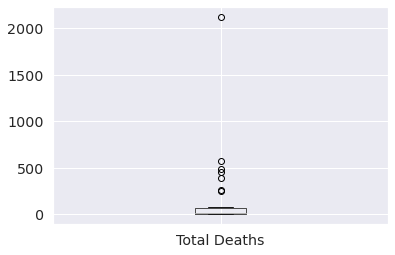

In [ ]:
sns.set(font_scale=1.3)
data_clustering.boxplot(column=['Total Deaths'])

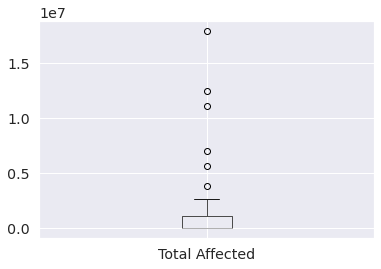

In [ ]:
data_clustering.boxplot(column=['Total Affected'])

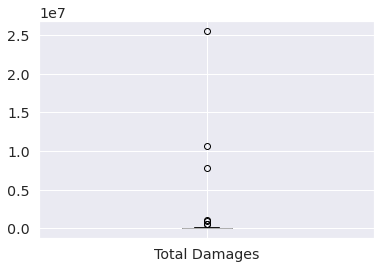

In [ ]:
data_clustering.boxplot(column=['Total Damages'])

Check the assumption

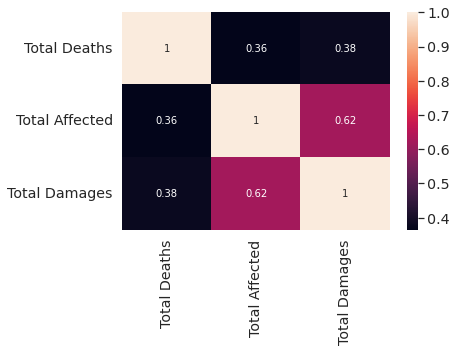

In [ ]:
%matplotlib inline
correlation = data_clustering.corr()
sns.heatmap(correlation,annot=True)

### K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
bestsilhoutte = 0

In [ ]:
for num_clusters in range_n_clusters:
 
 # initialise KMeans
 kmeans = KMeans(init="random", n_clusters=num_clusters, n_init=10, max_iter=300,random_state=42)
 #fit the clusters 
 kmeans.fit(data_clustering)
 clusters = kmeans.labels_
 print(num_clusters)
 
 # silhouette score
 score = silhouette_score(data_clustering, clusters, metric='euclidean')
 print('Silhouetter Score: %.3f' % score)
 silhouette_avg.append(score)

 if score > bestsilhoutte:
   bestclusters = clusters
   bestsilhoutte = score

2
Silhouetter Score: 0.776
3
Silhouetter Score: 0.755
4
Silhouetter Score: 0.830
5
Silhouetter Score: 0.720
6
Silhouetter Score: 0.675
7
Silhouetter Score: 0.513
8
Silhouetter Score: 0.550


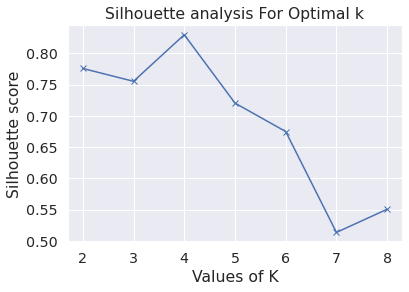

In [ ]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
data_result_kmeans = data_clustering.copy()

In [ ]:
data_result_kmeans['cluster'] = bestclusters

In [ ]:
data_result_kmeans

,Total Deaths,Total Affected,Total Damages,cluster
Code,,,,
1,396.0,11035033.0,0.0,3
2,24.0,1568744.0,0.0,2
3,10.0,502.0,0.0,2
4,1.0,13726.0,0.0,2
5,455.0,17888974.0,25556500.0,0
6,4.0,150.0,47000.0,2
7,0.0,1780.0,0.0,2
8,2.0,175.0,0.0,2
9,2126.0,3833811.0,7810000.0,1


In [ ]:
data_result_kmeans['cluster'].value_counts()

2    29
3     4
1     2
0     1
Name: cluster, dtype: int64

Text(0.5, 1.0, 'Total Deaths each Cluster')

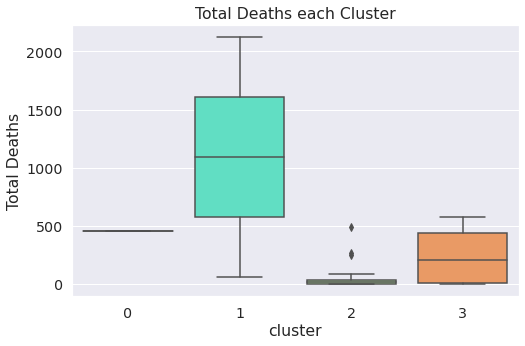

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='Total Deaths',data=data_result_kmeans, palette='rainbow')
plt.title("Total Deaths each Cluster")

Text(0.5, 1.0, 'Total Affected each Cluster')

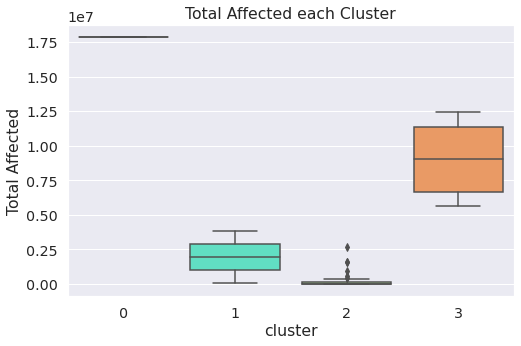

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='Total Affected',data=data_result_kmeans, palette='rainbow')
plt.title("Total Affected each Cluster")

Text(0.5, 1.0, 'Total Damaged each Cluster')

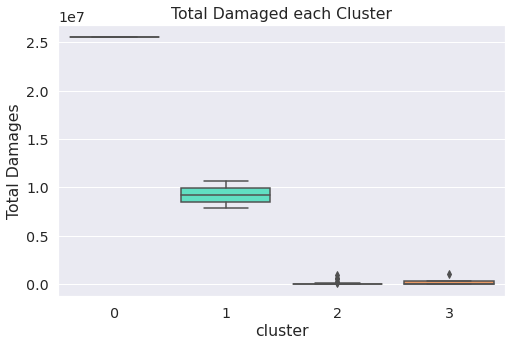

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='Total Damages',data=data_result_kmeans, palette='rainbow')
plt.title("Total Damaged each Cluster")